In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set(style="whitegrid")


In [6]:
# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

# Display first few rows
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [7]:
# Info about dataset
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [8]:
print(f"Minimum Selling Price: ₹{df['selling_price'].min()}")
print(f"Maximum Selling Price: ₹{df['selling_price'].max()}")


Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000


In [9]:
common_seller = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {common_seller}")



Most Common Seller Type: Individual


In [10]:
bikes_50k = df[df['km_driven'] > 50000]
print(f"Bikes with km_driven > 50,000: {bikes_50k.shape[0]}")


Bikes with km_driven > 50,000: 170


In [11]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [12]:
older_bikes = df[df['year'] <= 2015]
proportion = (older_bikes.shape[0] / df.shape[0]) * 100
print(f"Proportion of bikes from 2015 or older: {proportion:.2f}%")


Proportion of bikes from 2015 or older: 56.64%


In [13]:
missing_values = df.isnull().sum()
print(missing_values)


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [14]:
idx_max_price = df['ex_showroom_price'].idxmax()
highest_price_bike = df.loc[idx_max_price, 'name']
highest_ex_showroom_price = df.loc[idx_max_price, 'ex_showroom_price']

print(f"Highest Ex-Showroom Price: ₹{highest_ex_showroom_price}")
print(f"Bike: {highest_price_bike}")


Highest Ex-Showroom Price: ₹1278000.0
Bike: Harley-Davidson Street Bob


In [15]:
seller_count = df['seller_type'].value_counts()
print(seller_count)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


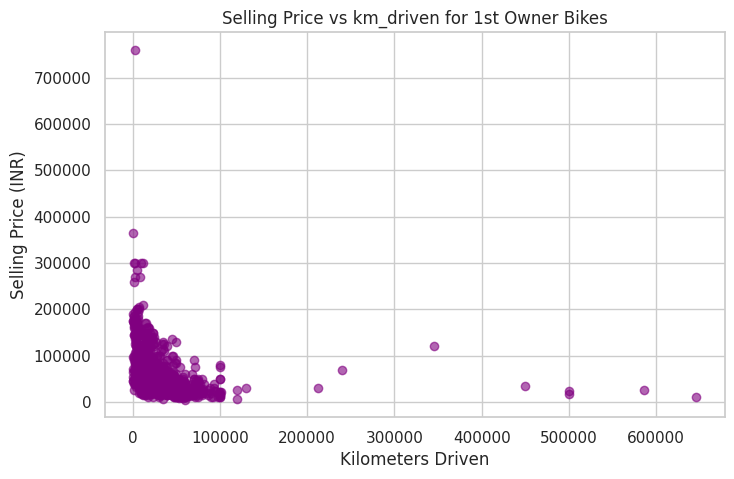

In [16]:
first_owner = df[df['owner'] == '1st owner']

plt.figure(figsize=(8,5))
plt.scatter(first_owner['km_driven'], first_owner['selling_price'], alpha=0.6, color='purple')
plt.title('Selling Price vs km_driven for 1st Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()



In [17]:
# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removing outliers
df_no_outliers = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]
print(f"Shape after removing outliers: {df_no_outliers.shape}")


Shape after removing outliers: (1022, 7)


<ipython-input-18-99d0a48f7b18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='selling_price', data=df_no_outliers, palette='coolwarm')


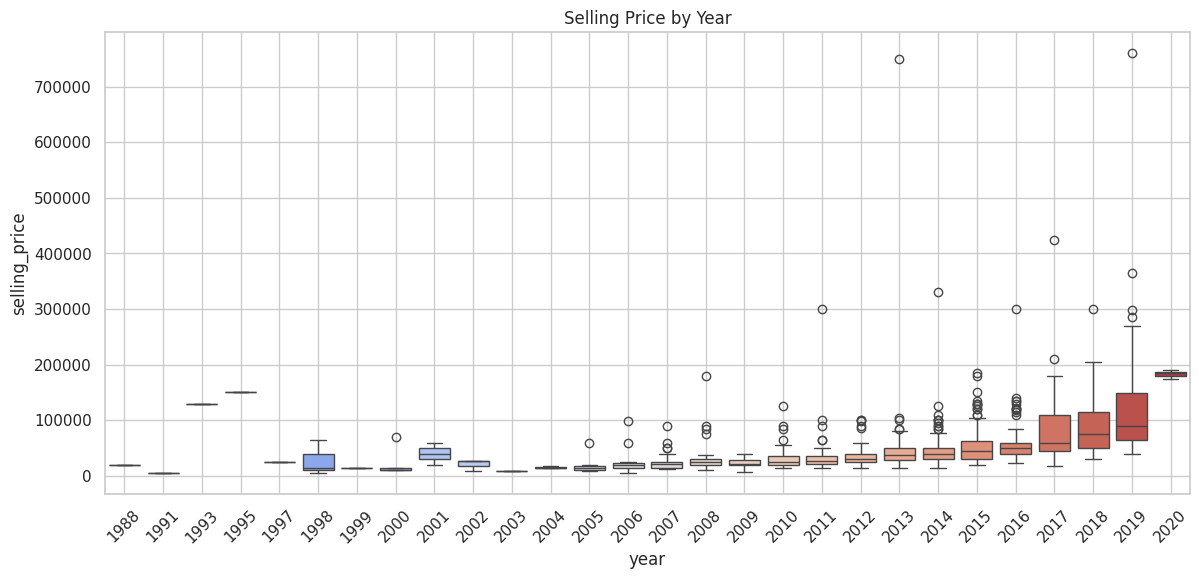

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x='year', y='selling_price', data=df_no_outliers, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Selling Price by Year')
plt.grid(True)
plt.show()


In [19]:
# Assuming current year is 2025
current_year = 2025
df['bike_age'] = current_year - df['year']

avg_depreciation = df.groupby('bike_age')['selling_price'].mean()
print(avg_depreciation)


bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [20]:
# Average selling price by year
mean_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Merge
df = df.merge(mean_price_by_year, on='year', suffixes=('', '_mean'))

# Bikes 50% above average price
premium_bikes = df[df['selling_price'] > 1.5 * df['selling_price_mean']]

premium_bikes[['name', 'year', 'selling_price']]


,name,year,selling_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
18,Royal Enfield Classic Gunmetal Grey,2018,150000
23,Jawa Standard,2019,180000
...,...,...,...
979,Royal Enfield Thunder 500,2015,105000
981,Royal Enfield Thunder 350,2013,105000
983,Royal Enfield Classic 350,2015,100000
984,Royal Enfield Classic 500,2014,95000


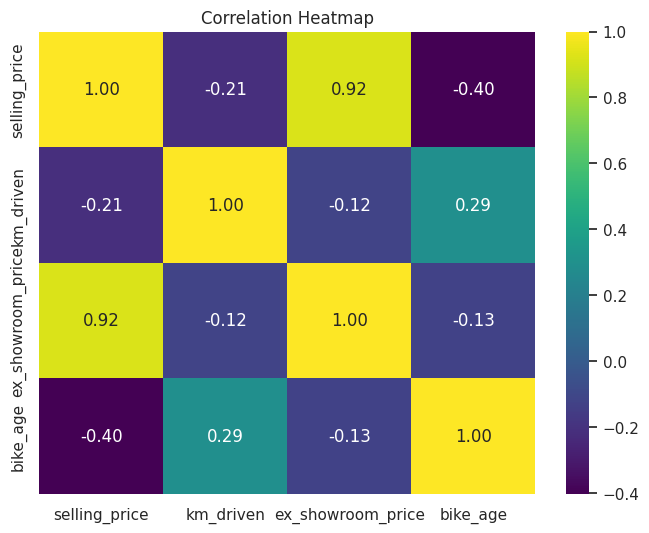

In [21]:
plt.figure(figsize=(8,6))
corr_matrix = df[['selling_price', 'km_driven', 'ex_showroom_price', 'bike_age']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [22]:
#EDA 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set(style="whitegrid")


In [23]:
# Load the dataset
car_df = pd.read_csv('Car Sale.csv')

# Display first few rows
car_df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [24]:
# Dataset Info
car_df.info()

# Summary statistics
car_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


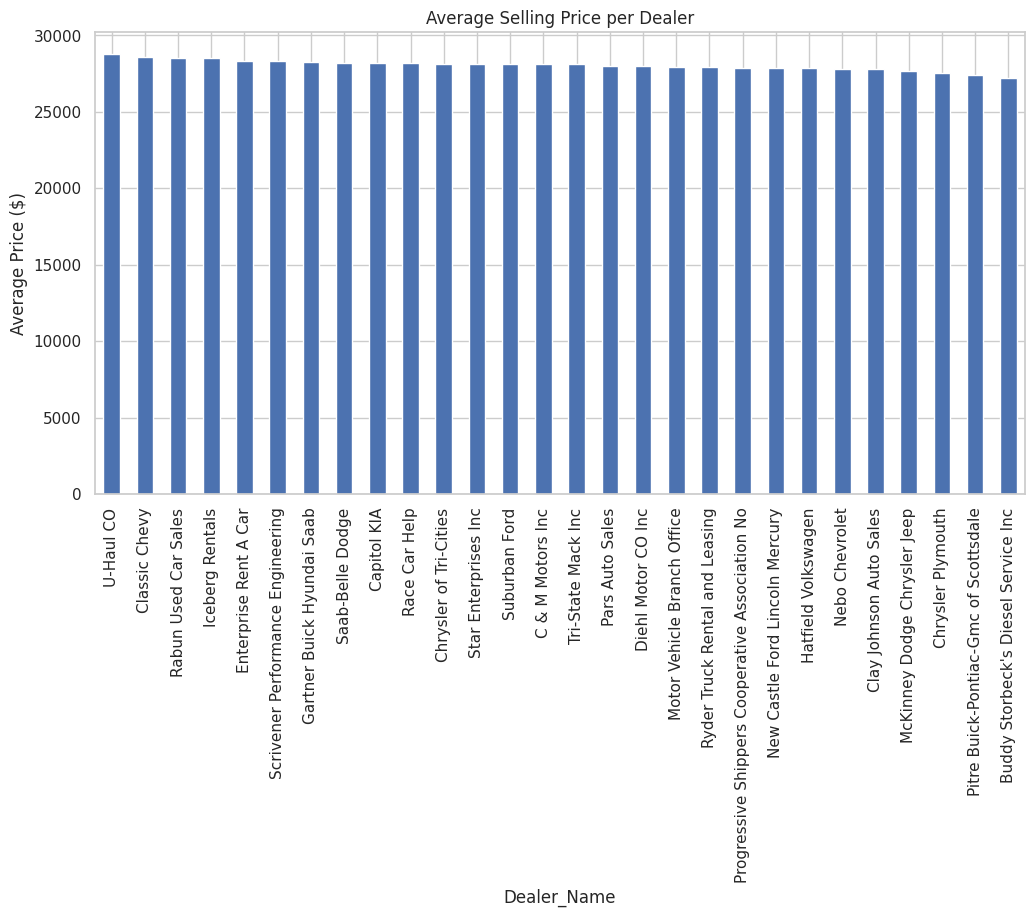

In [25]:
dealer_avg_price = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
dealer_avg_price.plot(kind='bar')
plt.title('Average Selling Price per Dealer')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()


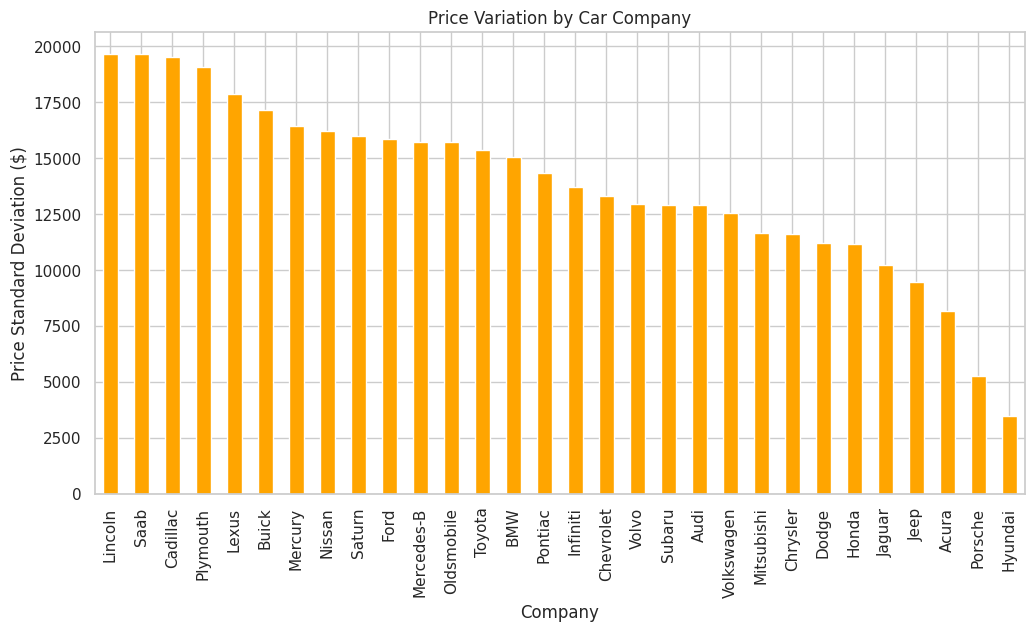

Brand with highest price variation: Lincoln


In [26]:
brand_variation = car_df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

brand_variation.plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Price Variation by Car Company')
plt.ylabel('Price Standard Deviation ($)')
plt.xticks(rotation=90)
plt.show()

highest_variation = brand_variation.idxmax()
print(f"Brand with highest price variation: {highest_variation}")


<ipython-input-27-3ddb1acbeaf8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price ($)', data=car_df, palette='Set2')


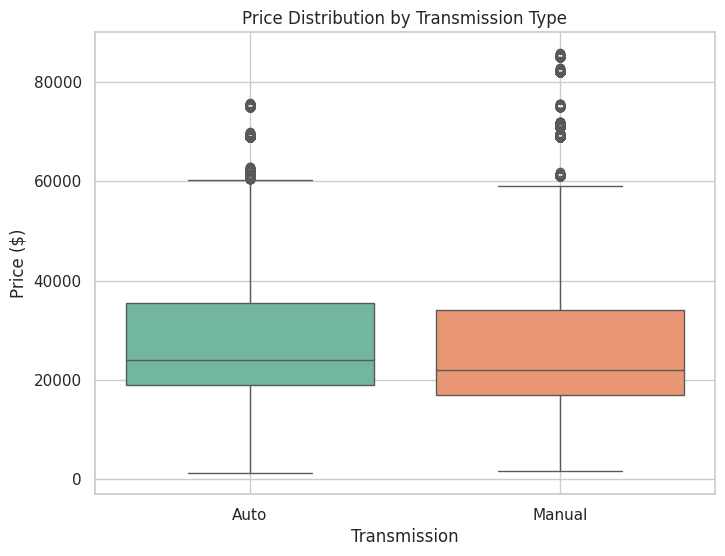

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Transmission', y='Price ($)', data=car_df, palette='Set2')
plt.title('Price Distribution by Transmission Type')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Region', y='Price ($)', data=car_df, palette='Set3')
plt.title('Price Distribution by Region')
plt.grid(True)
plt.show()


In [30]:
plt.figure(figsize=(8,6))
car_df['Body_Style'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars by Body Style')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()


KeyError: 'Body_Style'

<Figure size 800x600 with 0 Axes>

<ipython-input-31-10b145a7107c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Price ($)', data=car_df, estimator=np.mean, ci=None, hue='Gender')


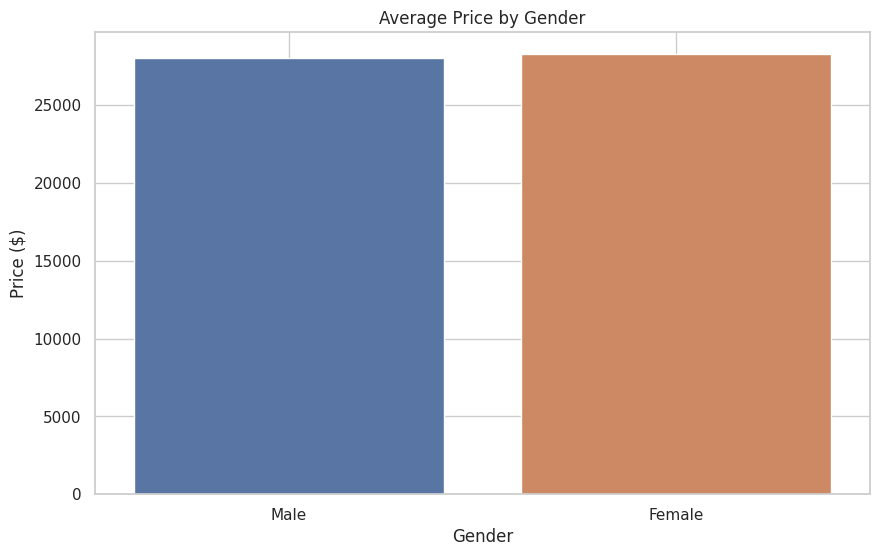

ValueError: Could not interpret value `Annual_Income` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Price ($)', data=car_df, estimator=np.mean, ci=None, hue='Gender')
plt.title('Average Price by Gender')
plt.grid(True)
plt.show()

# Relationship with Annual Income
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual_Income', y='Price ($)', data=car_df, hue='Gender')
plt.title('Price vs Annual Income by Gender')
plt.grid(True)
plt.show()


In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=car_df, x='Price ($)', hue='Region', multiple='stack')
plt.title('Price Distribution across Regions')
plt.grid(True)
plt.show()

# Number of Cars Sold per Region
car_df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Car Sales Distribution by Region')
plt.show()



ValueError: Could not interpret value `Region` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

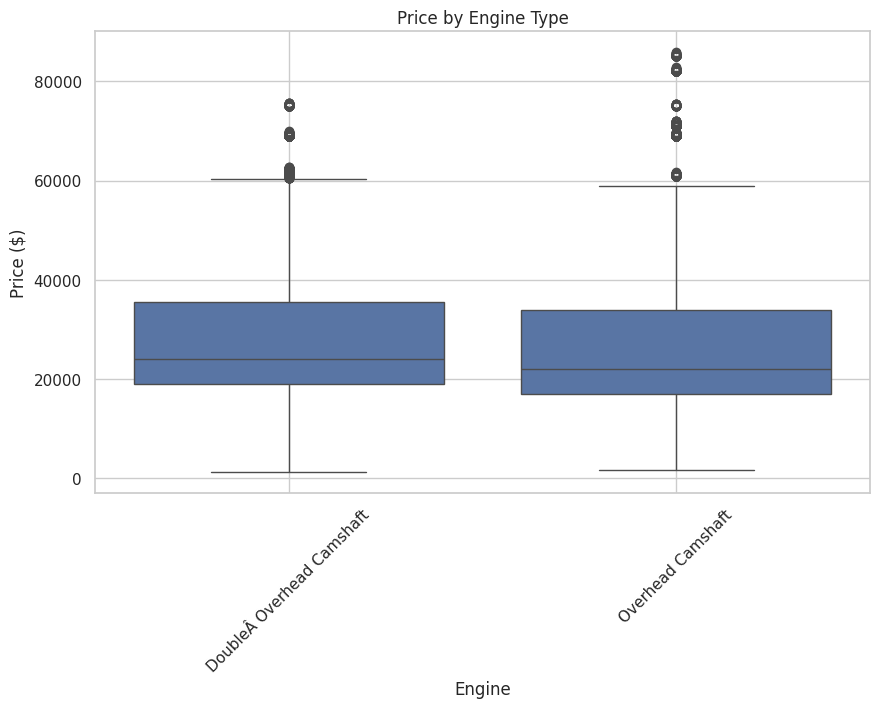

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Engine', y='Price ($)', data=car_df)
plt.title('Price by Engine Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [34]:
# Create income brackets
car_df['Income_Bracket'] = pd.cut(car_df['Annual_Income'], bins=[0, 50000, 100000, 150000, 200000, np.inf], labels=['Low', 'Medium', 'High', 'Very High', 'Ultra High'])

plt.figure(figsize=(10,6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=car_df)
plt.title('Car Price by Customer Income Bracket')
plt.grid(True)
plt.show()


KeyError: 'Annual_Income'

<ipython-input-35-f771a60ee558>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price ($)', data=top_models_df, palette='cool')


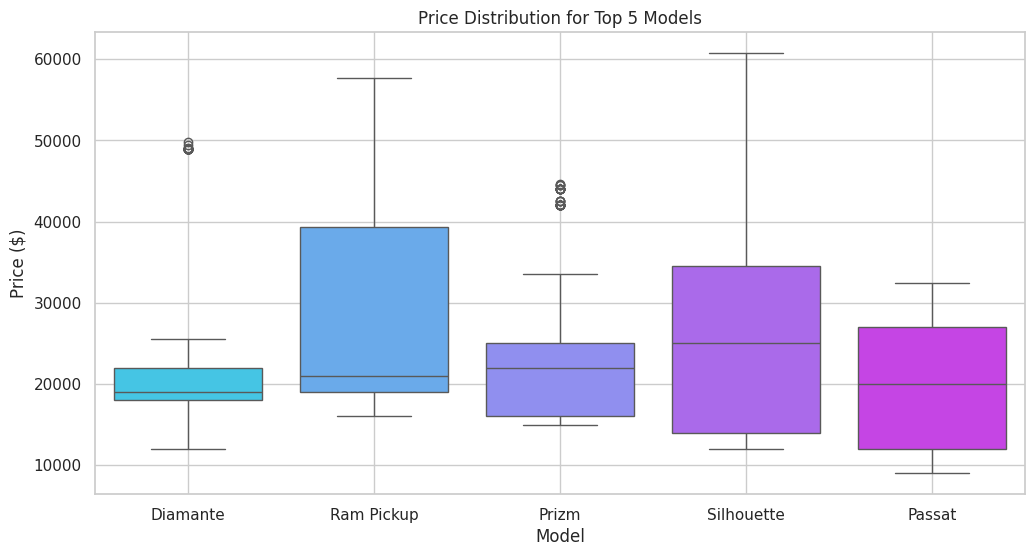

In [35]:
top_models = car_df['Model'].value_counts().head(5).index

top_models_df = car_df[car_df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_df, palette='cool')
plt.title('Price Distribution for Top 5 Models')
plt.grid(True)
plt.show()


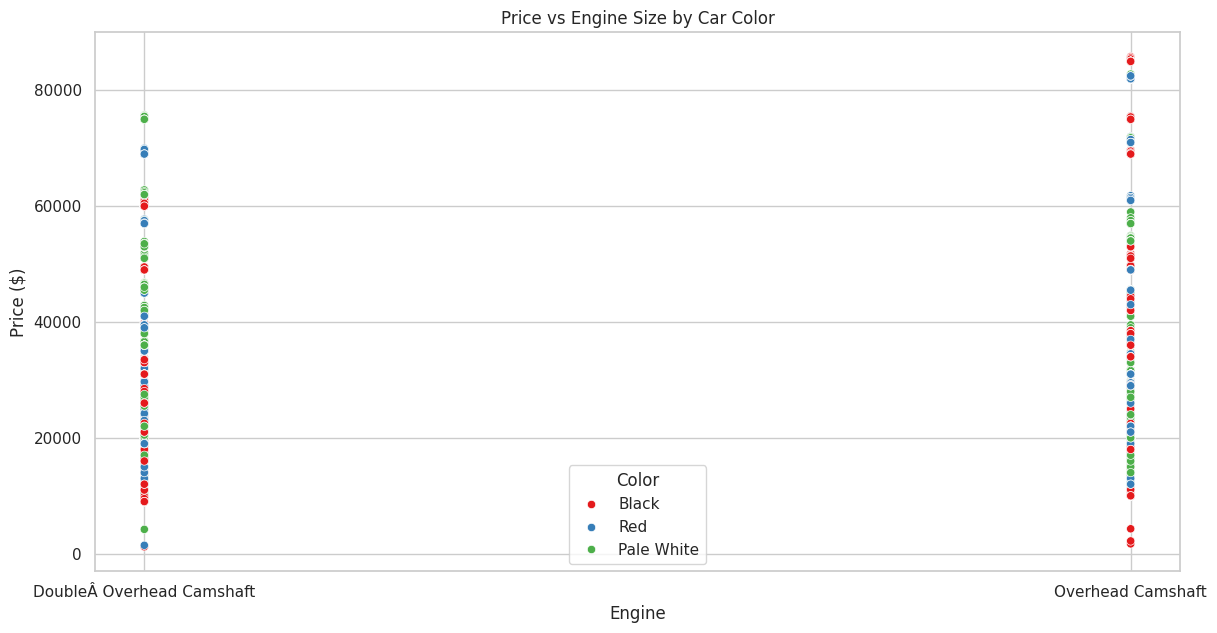

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [36]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=car_df, palette='Set1')
plt.title('Price vs Engine Size by Car Color')
plt.grid(True)
plt.show()

color_variation = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print(color_variation)


<ipython-input-37-db673b10ebcc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=car_df, palette='muted')


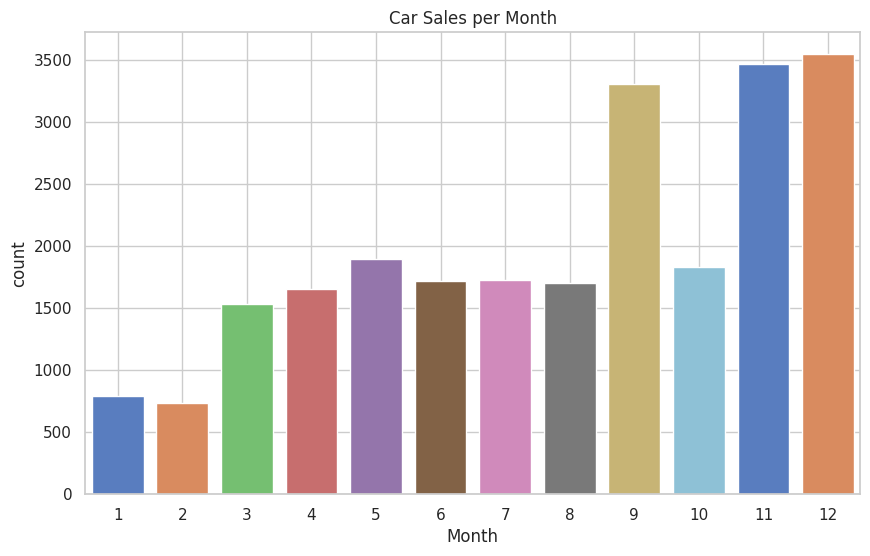

In [37]:
# Convert Date column to datetime
car_df['Date'] = pd.to_datetime(car_df['Date'])

# Extract Month
car_df['Month'] = car_df['Date'].dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=car_df, palette='muted')
plt.title('Car Sales per Month')
plt.grid(True)
plt.show()


In [38]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Body_Style', y='Price ($)', hue='Transmission', data=car_df)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


ValueError: Could not interpret value `Body_Style` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x700 with 0 Axes>

In [39]:
plt.figure(figsize=(8,6))
correlation = car_df[['Price ($)', 'Engine', 'Annual_Income']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


KeyError: "['Annual_Income'] not in index"

<Figure size 800x600 with 0 Axes>

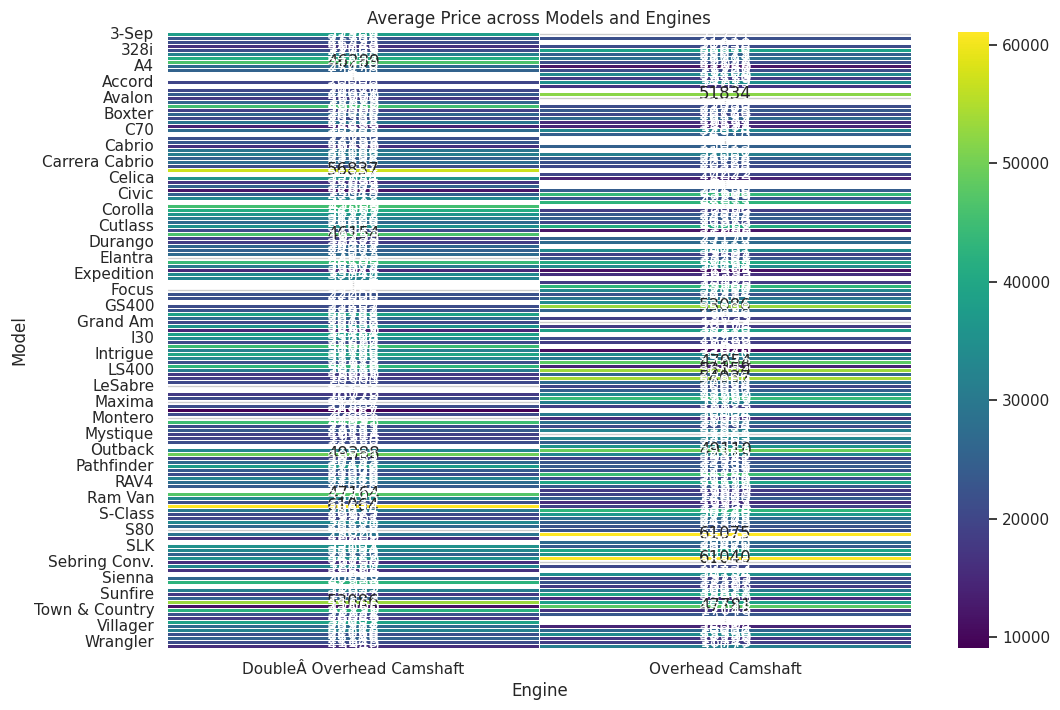

In [40]:
avg_price_model_engine = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

plt.figure(figsize=(12,8))
sns.heatmap(avg_price_model_engine, cmap='viridis', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Average Price across Models and Engines')
plt.show()


In [41]:
#EDA 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set(style="whitegrid")


In [42]:
# Load the dataset
amazon_df = pd.read_csv('amazon.csv')

# Display first few rows
amazon_df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [43]:
# Dataset Info
amazon_df.info()

# Summary statistics
amazon_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [44]:
category_avg_rating = amazon_df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
category_avg_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

In [45]:
top_rating_count = amazon_df.groupby('category')['rating_count'].idxmax()

top_products = amazon_df.loc[top_rating_count][['category', 'product_name', 'rating_count']]

top_products


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
772,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


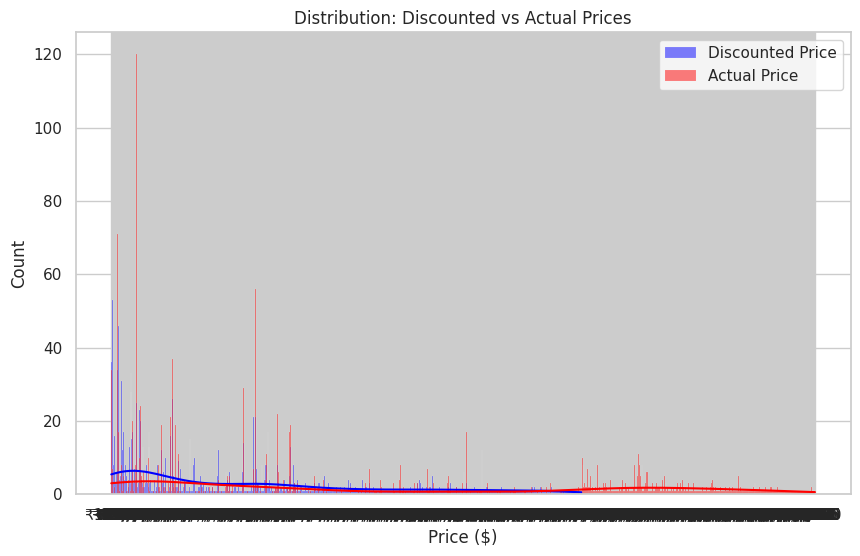

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(amazon_df['discounted_price'], color='blue', label='Discounted Price', kde=True)
sns.histplot(amazon_df['actual_price'], color='red', label='Actual Price', kde=True)
plt.legend()
plt.title('Distribution: Discounted vs Actual Prices')
plt.xlabel('Price ($)')
plt.grid(True)
plt.show()


In [47]:
avg_discount = amazon_df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_discount.plot(kind='bar', color='purple')
plt.title('Average Discount Percentage by Category')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

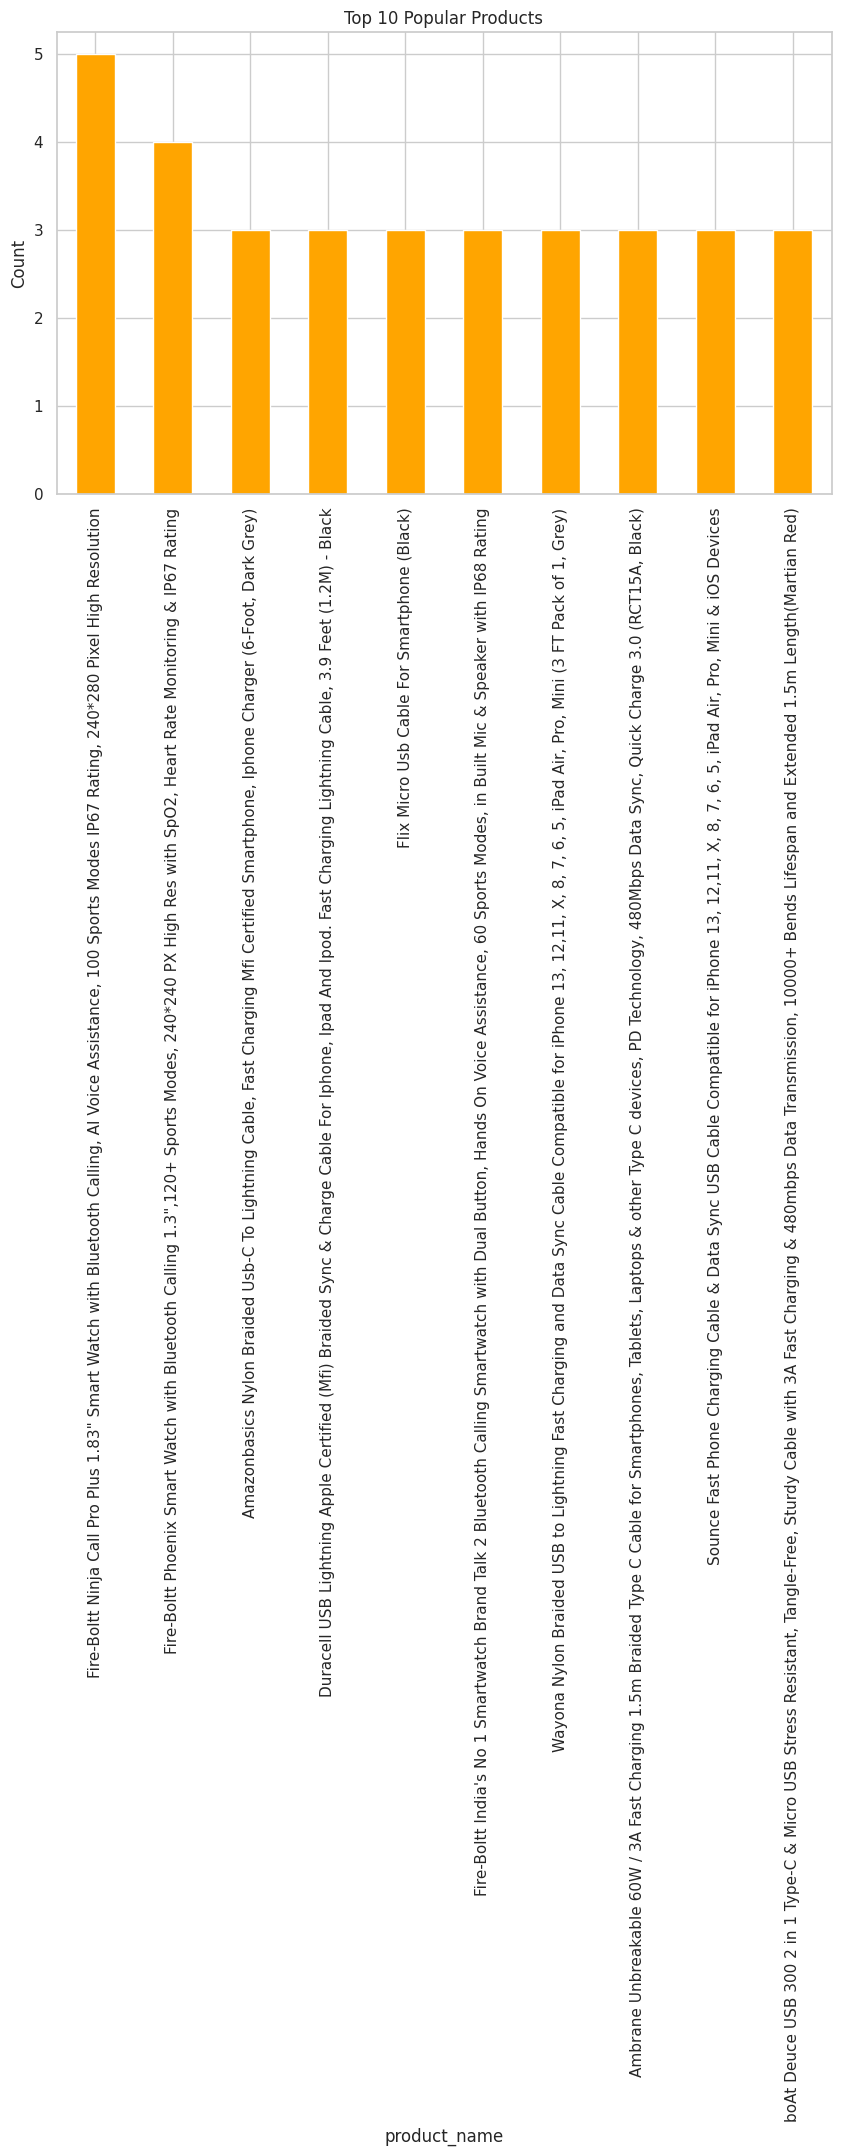

In [48]:
popular_products = amazon_df['product_name'].value_counts().head(10)

plt.figure(figsize=(10,6))
popular_products.plot(kind='bar', color='orange')
plt.title('Top 10 Popular Products')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


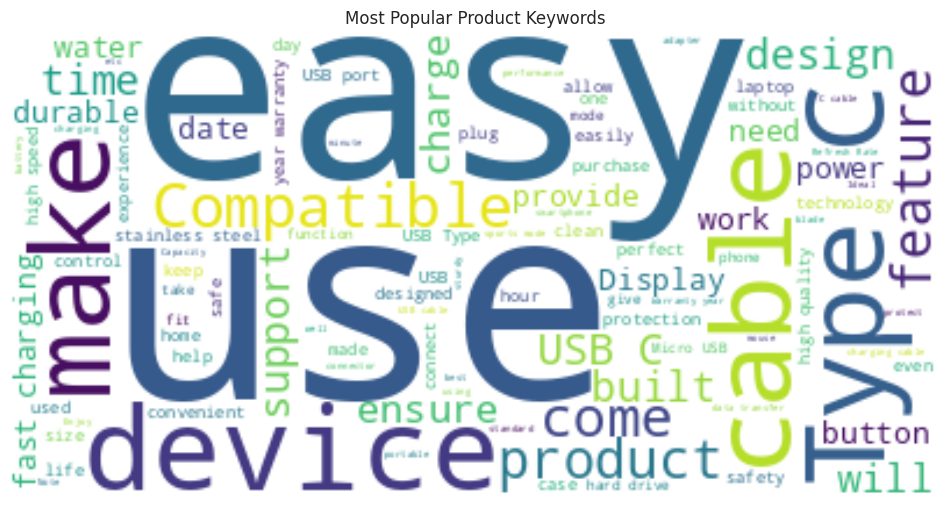

In [49]:
# Assuming keywords are present inside the 'about_product' column
from wordcloud import WordCloud

text = " ".join(amazon_df['about_product'].dropna())

plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Popular Product Keywords')
plt.show()


In [50]:
popular_reviews = amazon_df['review_title'].value_counts().head(10)

popular_reviews


,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"Above average phone,Worth For The Money 💰,Okie,Phone is excellent,Purchased in good budget at 12k,It can fulfill basic needs in affordable price range,Nice,About features",6
"Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok",6
"The metal pin is losing it's strength,Sahi h bs 44 rupe ki and dilivery charge 40,Good Charging cable,Good sturdy micro usb cable with good charging speeds,Cheapest micro USB cable in the market,boat is better than this,I bought this for 199rs best charging cable for all mobiles,Good",5
"GOOD,Thank you Amazon very good charging cable,Good,Very good product,good quality,Very Good Product,This is fast charging USB!,Simply perfect at the price of below 100",5


In [51]:
correlation = amazon_df['discounted_price'].corr(amazon_df['rating'])

print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")


ValueError: could not convert string to float: '₹399'

In [52]:
top5_categories = amazon_df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))
top5_categories.plot(kind='bar', color='green')
plt.title('Top 5 Categories by Highest Ratings')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

- **High Discount, Low Rating Products** should be reviewed for quality.
- **Categories with Low Average Ratings** can have better product selections.
- **Products with High Rating Count and Low Price** can be used for promotions.
- **Keyword Optimization**: Popular keywords can be utilized more for SEO/advertising.
- **Outlier Handling**: Products with extremely high or low prices should be reviewed.

In [54]:
#EDA 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set(style="whitegrid")


In [55]:
# Load the dataset
spotify_df = pd.read_csv('spotify.csv')

# Display first few rows
spotify_df.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [56]:
# Check for null values
print(spotify_df.isnull().sum())

# Drop if any nulls
spotify_df = spotify_df.dropna()

# Check for duplicates
print(spotify_df.duplicated().sum())

# Drop duplicates if any
spotify_df = spotify_df.drop_duplicates()

# Confirm changes
spotify_df.info()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
27
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


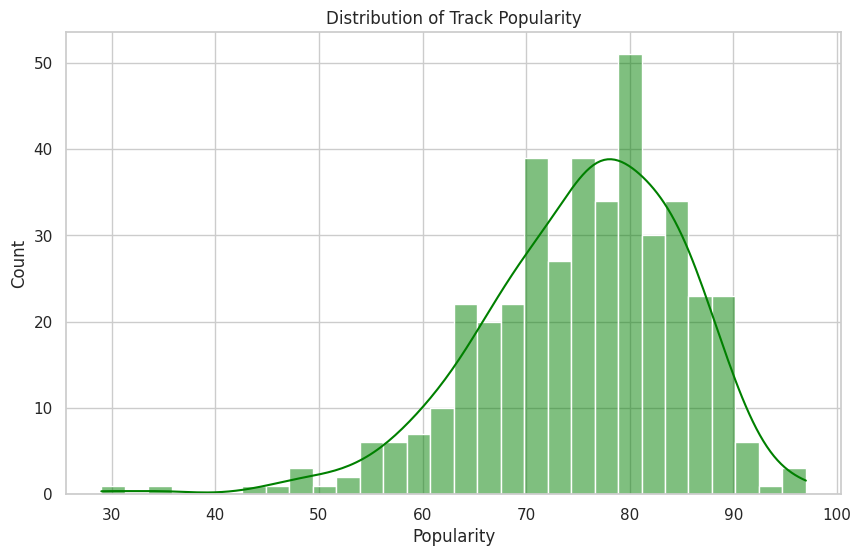

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(spotify_df['Popularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.grid(True)
plt.show()


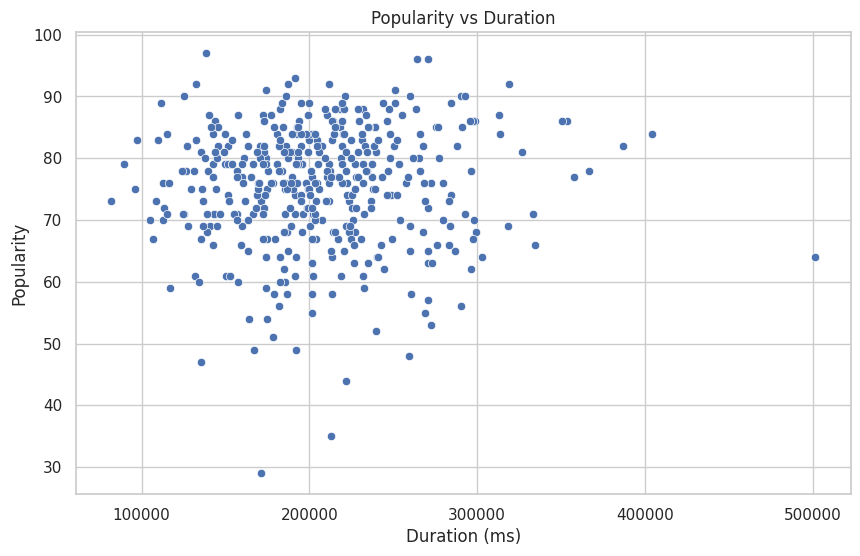

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_df)
plt.title('Popularity vs Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


In [59]:
top_artists = spotify_df['Artist Name'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_artists.plot(kind='bar', color='purple')
plt.title('Top 10 Artists with Most Tracks')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

top_artists


KeyError: 'Artist Name'

In [60]:
# Find top 5 artists by track count
top5_artists = spotify_df['Artist Name'].value_counts().head(5).index

# Filter dataset
top5_df = spotify_df[spotify_df['Artist Name'].isin(top5_artists)]

# Average popularity
top5_avg_popularity = top5_df.groupby('Artist Name')['Popularity'].mean().sort_values(ascending=False)

top5_avg_popularity.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Average Popularity of Top 5 Artists')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

top5_avg_popularity


KeyError: 'Artist Name'

In [61]:
for artist in top5_artists:
    print(f"\nMost Popular Track for {artist}:")
    top_track = spotify_df[spotify_df['Artist Name'] == artist].sort_values(by='Popularity', ascending=False).head(1)
    print(top_track[['Track Name', 'Popularity']])


NameError: name 'top5_artists' is not defined

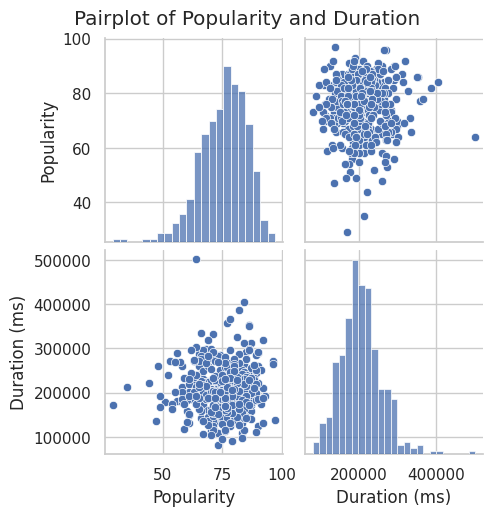

In [62]:
sns.pairplot(spotify_df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pairplot of Popularity and Duration', y=1.02)
plt.show()


In [63]:
# Top 10 artists based on average popularity
artist_popularity = spotify_df.groupby('Artist Name')['Popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
artist_popularity.plot(kind='bar', color='coral')
plt.title('Top Artists by Average Popularity')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


KeyError: 'Artist Name'

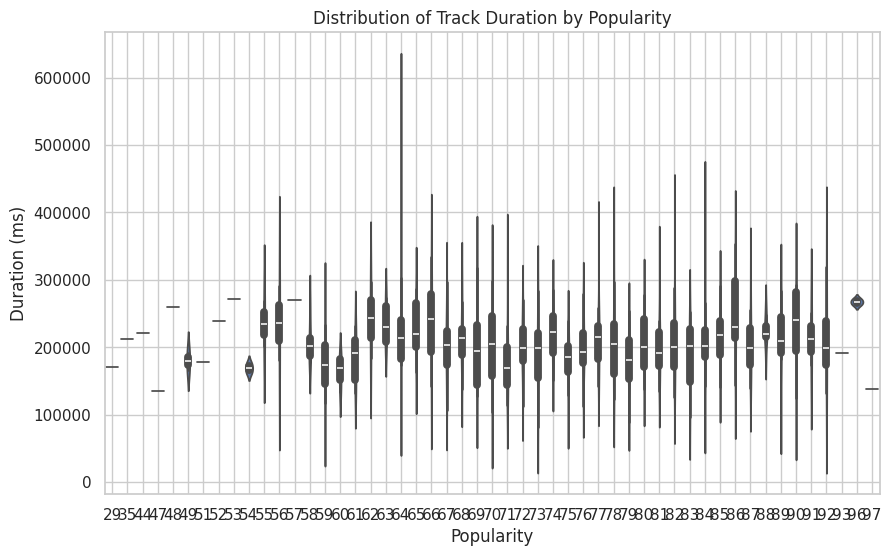

In [64]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Popularity', y='Duration (ms)', data=spotify_df)
plt.title('Distribution of Track Duration by Popularity')
plt.grid(True)
plt.show()

